# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.


$$
d_w Q = d_w \left[ (y - Xw)^T (y - Xw) \right] = \\
= d_w \left[ (y - Xw)^T (y - Xw) \right] + (y - Xw)^T d_w \left[ (y - Xw) \right] = \\
= d_w \left[ (-Xw)^T (y - Xw) \right] - (y - Xw)^T X d_w = \\
= - d_w^T X^T (y - Xw) - (y - Xw)^T X d_w = \\
= -2 (y - Xw)^T X d_w
$$

Ответ: $$ - \dfrac{2}{\ell} (y - Xw)^T X
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Ник в контесте: e.smeshkova

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124590036/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124738147/

* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124590732/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124595963/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124596893/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

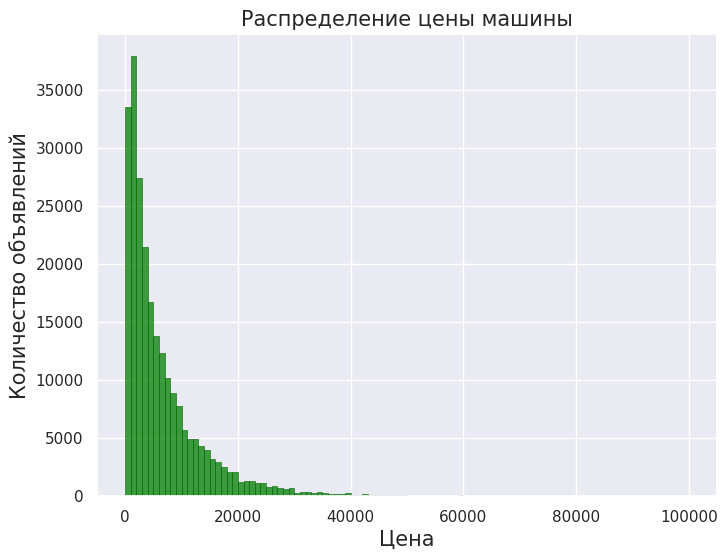

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Распределение цены машины', fontsize=15)
sns.histplot(data.price,
             bins=100,
             color='green',
             edgecolor='darkgreen')
plt.xlabel('Цена', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)
plt.show()

Попробуем заменить на логарифм:

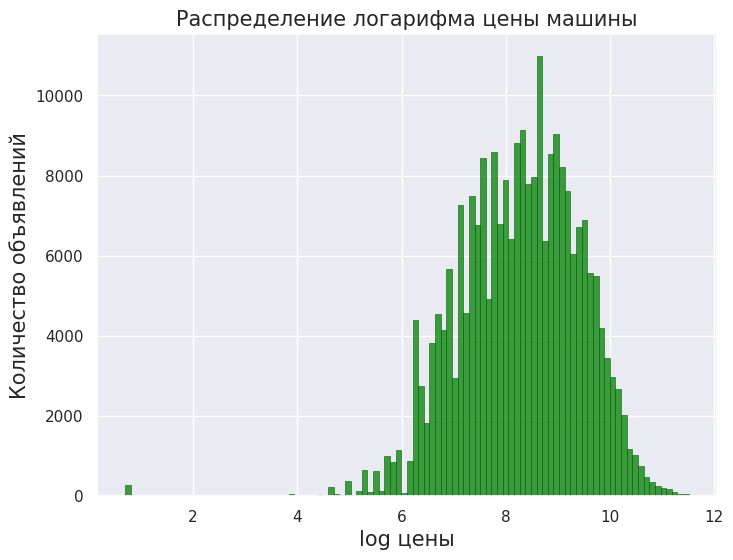

In [10]:
data['log_price'] = np.log1p(data['price'])
plt.figure(figsize=(8, 6))
plt.title('Распределение логарифма цены машины', fontsize=15)
sns.histplot(data.log_price,
             bins=100,
             color='green',
             edgecolor='darkgreen')
plt.xlabel('log цены', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)
plt.show()

Теперь распределение больше похоже на нормальное - значит, замена на логарифм была полезной. Чтобы оно было более ровным, удалим выбросы: значения, у которых log меньше 5 или больше 11.5

In [11]:
data = data.drop(data[data['log_price'] <= 5].index)
data = data.drop(data[data['log_price'] >= 11.5].index)

Проанализируем тип столбцов, построим графики зависимости целевой переменной от признака, распределения значений признака:

In [12]:
data.dtypes

,0
brand,object
model,object
vehicleType,object
gearbox,object
fuelType,object
notRepairedDamage,object
powerPS,int64
kilometer,int64
autoAgeMonths,int64
price,int64


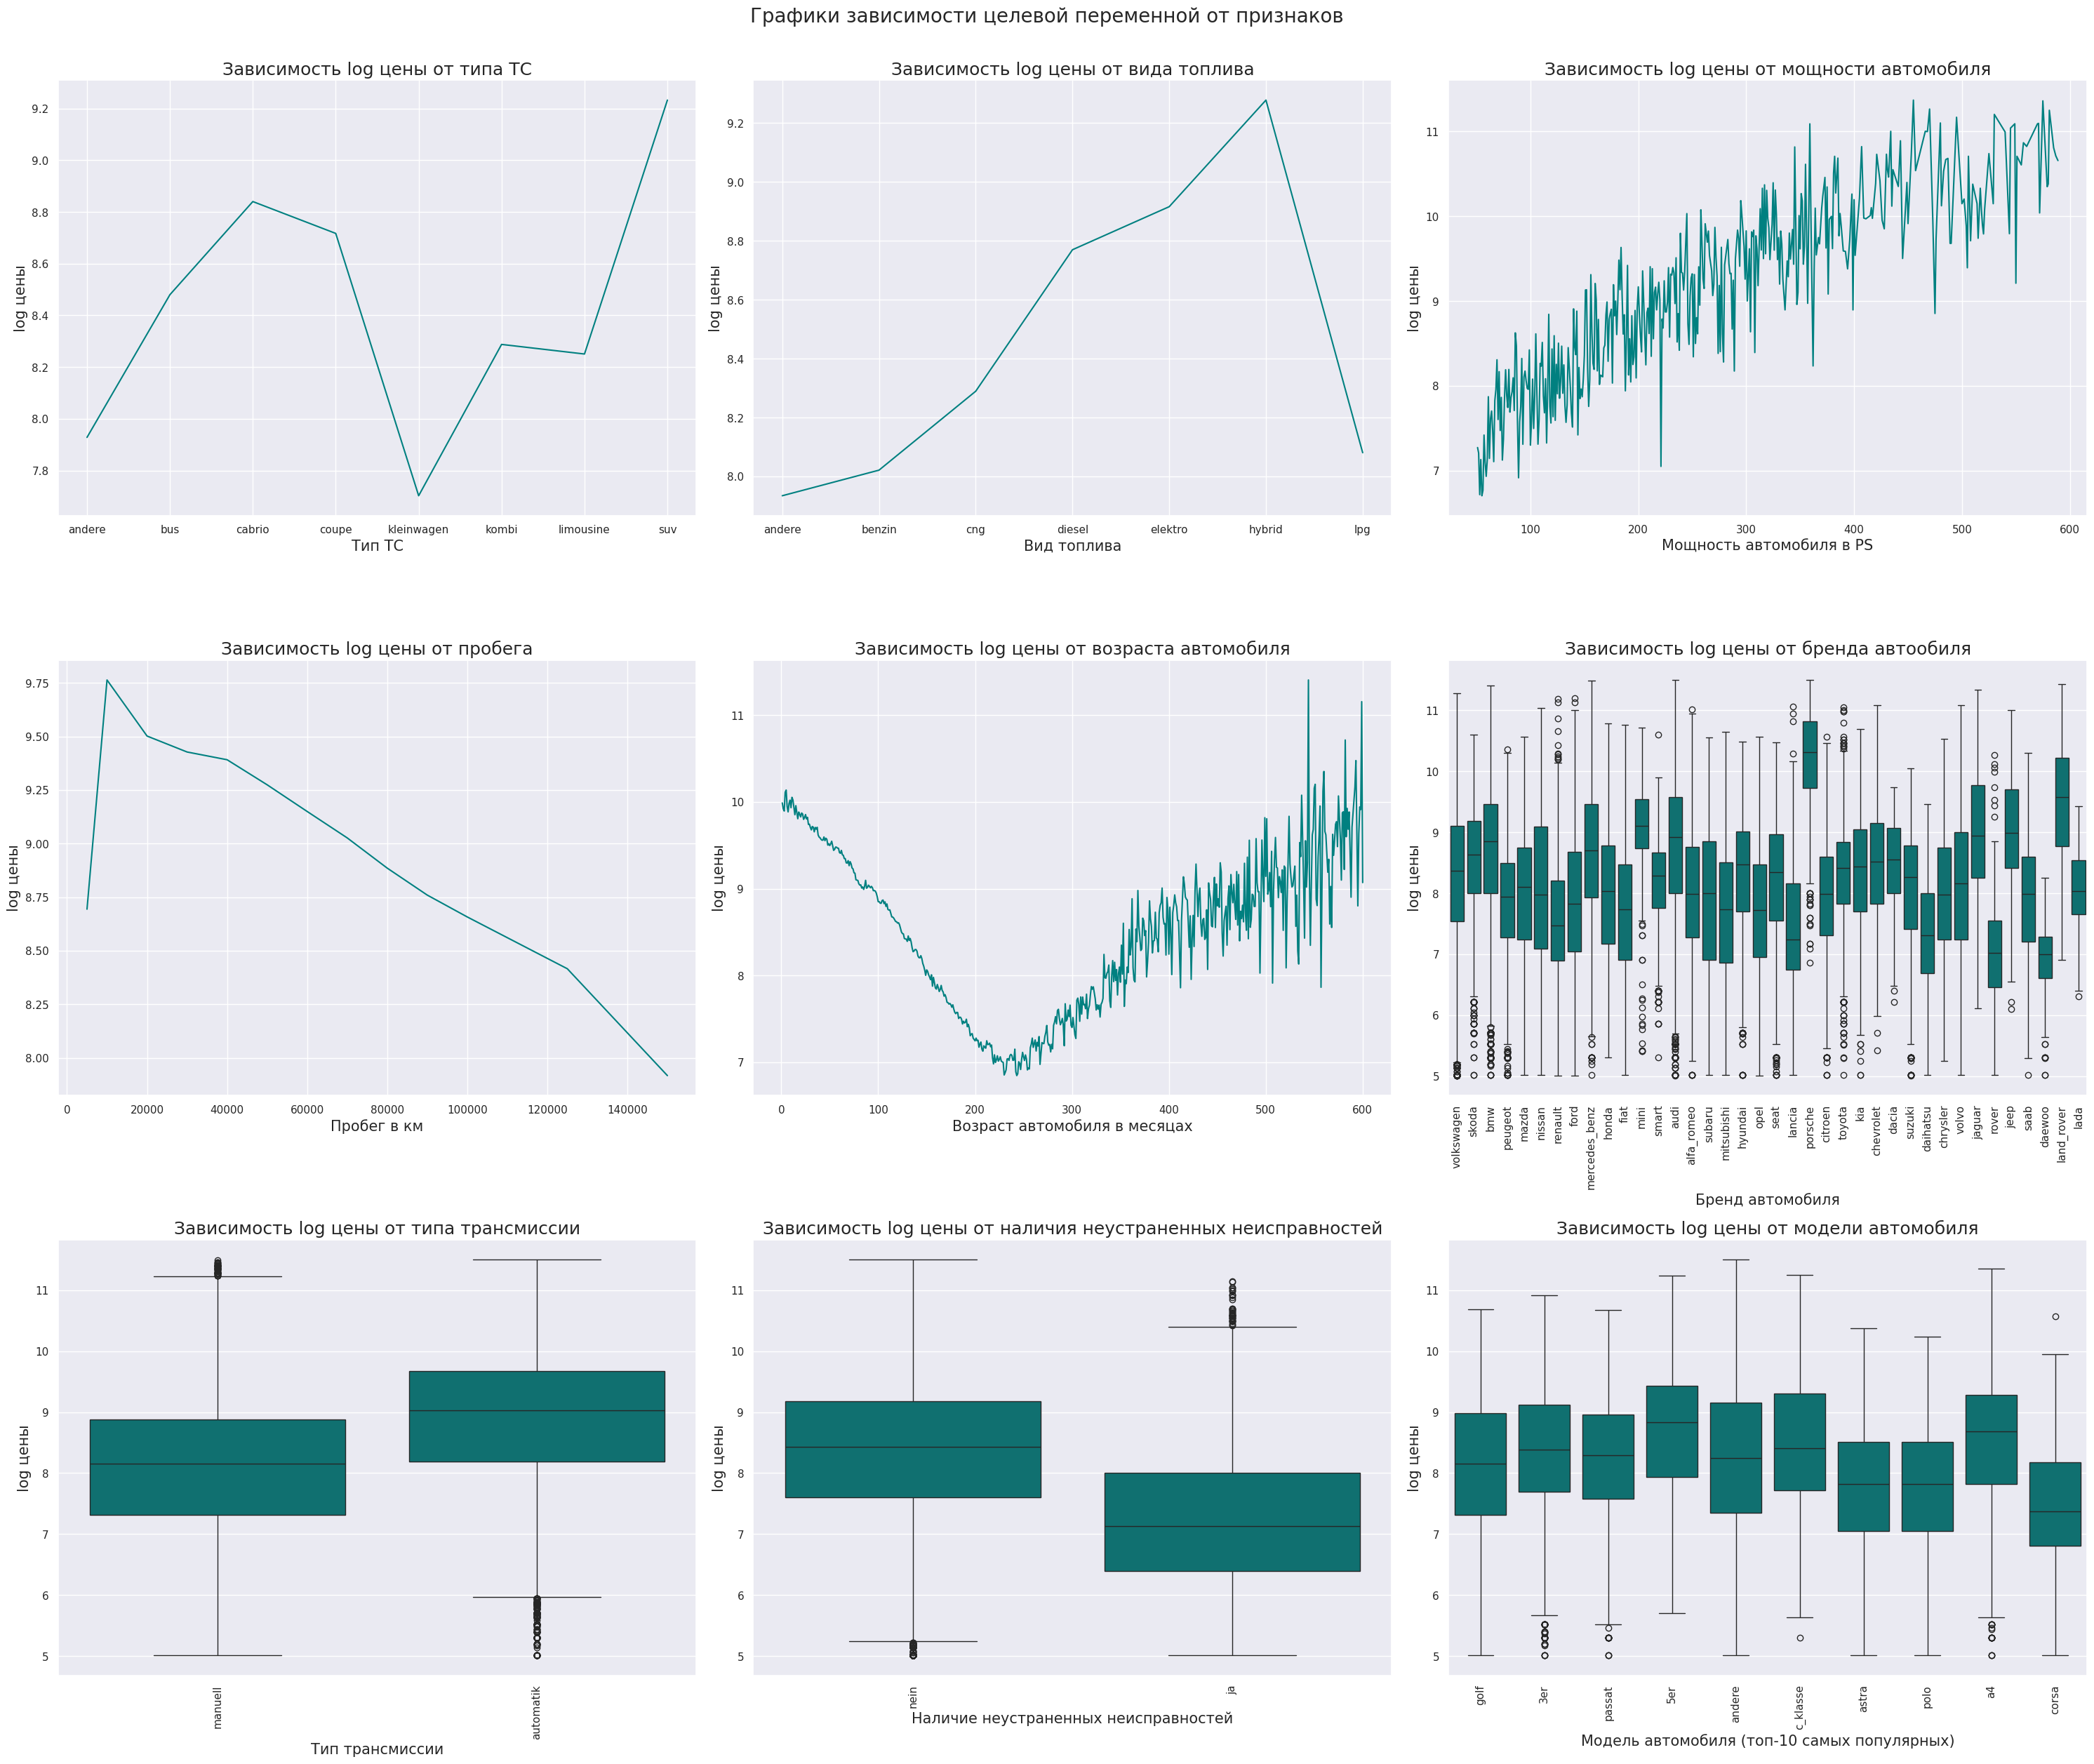

In [13]:
plt.figure(figsize=(30, 25))
plt.suptitle('Графики зависимости целевой переменной от признаков', fontsize=20, y=1.005)

plt.subplot(3, 3, 1)
vehicleTypes = pd.DataFrame(data.groupby(data['vehicleType'])['log_price'].mean())
vehicleTypes.reset_index(inplace=True)
sns.lineplot(data=vehicleTypes, y='log_price', x='vehicleType', color='teal')
plt.xlabel('Тип ТС', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от типа ТС', fontsize=18)

plt.subplot(3, 3, 2)
fuelTypes = pd.DataFrame(data.groupby(data['fuelType'])['log_price'].mean())
fuelTypes.reset_index(inplace=True)
sns.lineplot(data=fuelTypes, y='log_price', x='fuelType', color='teal')
plt.xlabel('Вид топлива', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от вида топлива', fontsize=18)

plt.subplot(3, 3, 3)
powerPSs = pd.DataFrame(data.groupby(data['powerPS'])['log_price'].mean())
powerPSs.reset_index(inplace=True)
sns.lineplot(data=powerPSs, y='log_price', x='powerPS', color='teal')
plt.xlabel('Мощность автомобиля в PS', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от мощности автомобиля', fontsize=18)

plt.subplot(3, 3, 4)
kilometers = pd.DataFrame(data.groupby(data['kilometer'])['log_price'].mean())
kilometers.reset_index(inplace=True)
sns.lineplot(data=kilometers, y='log_price', x='kilometer', color='teal')
plt.xlabel('Пробег в км', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от пробега', fontsize=18)

plt.subplot(3, 3, 5)
autoAgeMonthss = pd.DataFrame(data.groupby(data['autoAgeMonths'])['log_price'].mean())
autoAgeMonthss.reset_index(inplace=True)
sns.lineplot(data=autoAgeMonthss, y='log_price', x='autoAgeMonths', color='teal')
plt.xlabel('Возраст автомобиля в месяцах', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от возраста автомобиля', fontsize=18)

plt.subplot(3, 3, 6)
sns.boxplot(x='brand', y='log_price', data=data, color='teal')
plt.xlabel('Бренд автомобиля', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от бренда автообиля', fontsize=18)
plt.xticks(rotation=90)

plt.subplot(3, 3, 7)
sns.boxplot(x='gearbox', y='log_price', data=data, color='teal')
plt.xlabel('Тип трансмисcии', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от типа трансмисcии', fontsize=18)
plt.xticks(rotation=90)

plt.subplot(3, 3, 8)
sns.boxplot(x='notRepairedDamage', y='log_price', data=data, color='teal')
plt.xlabel('Наличие неустраненных неисправностей', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от наличия неустраненных неисправностей', fontsize=18)
plt.xticks(rotation=90)

top_10_models = data['model'].value_counts().nlargest(10).index
filtered_data = data[data['model'].isin(top_10_models)]
plt.subplot(3, 3, 9)
sns.boxplot(x='model', y='log_price', data=filtered_data, color='teal')
plt.xlabel('Модель автомобиля (топ-10 самых популярных)', fontsize=15)
plt.ylabel('log цены', fontsize=15)
plt.title('Зависимость log цены от модели автомобиля', fontsize=18)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

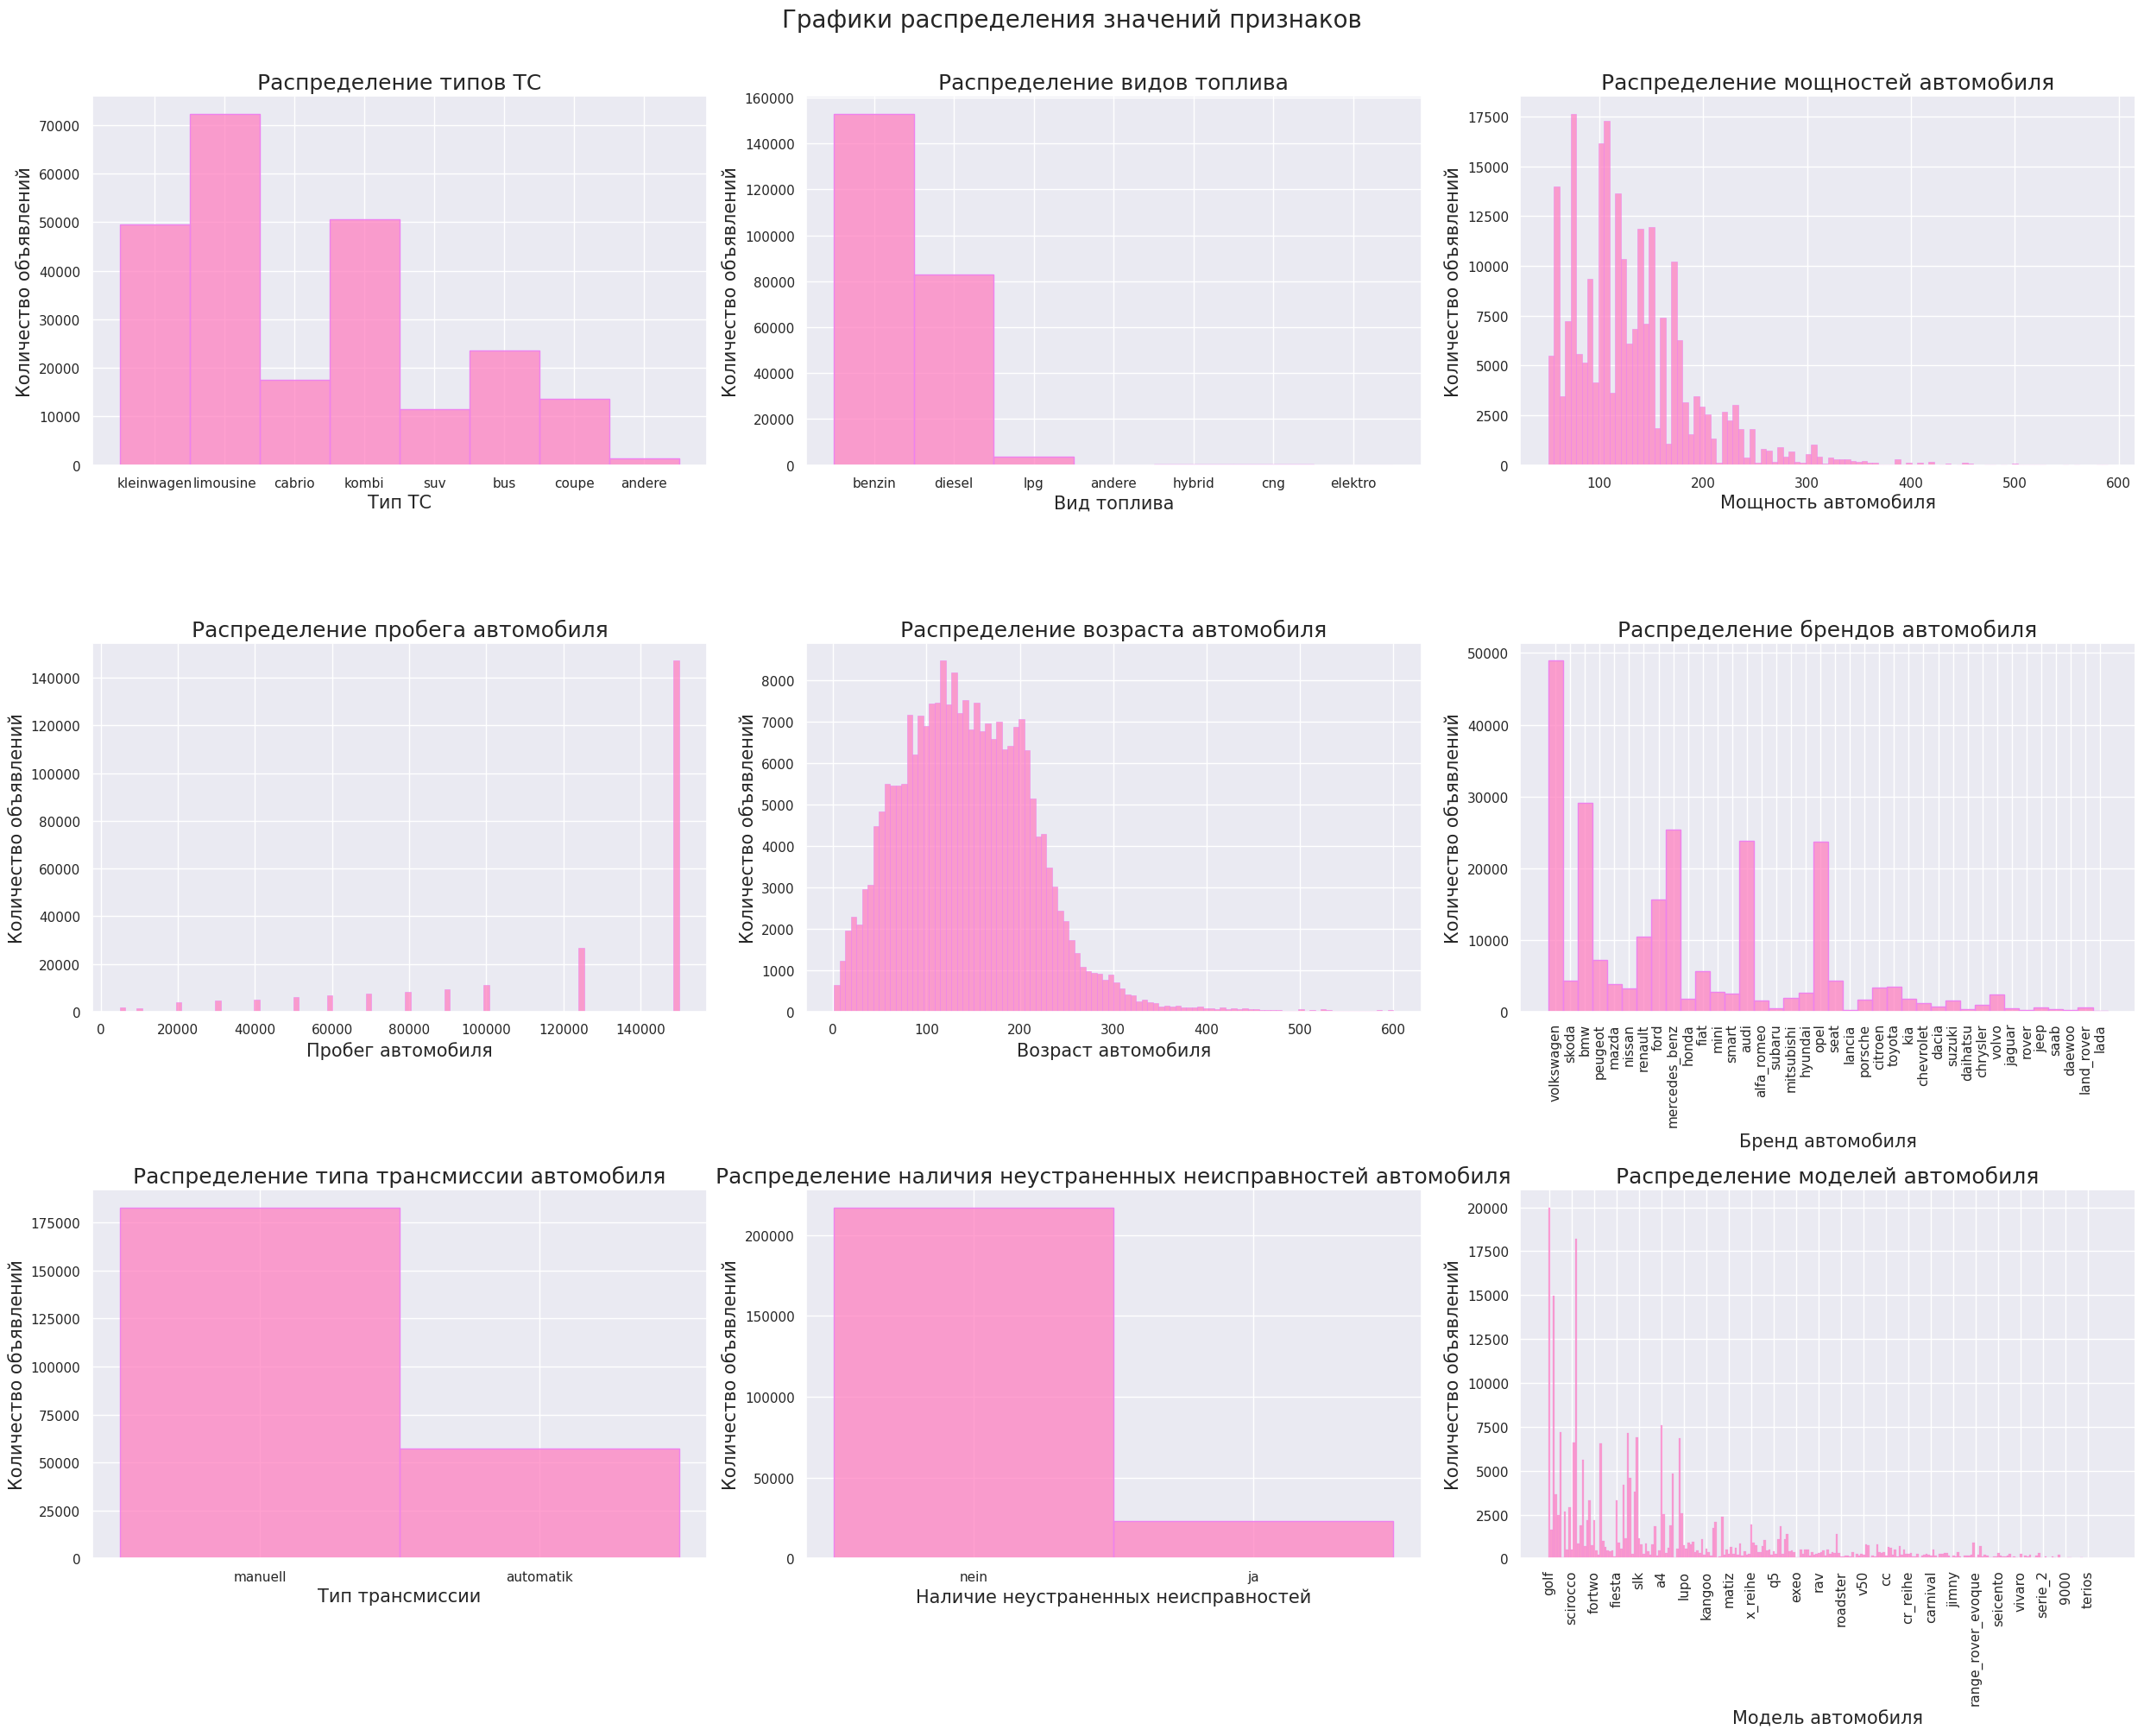

In [14]:
plt.figure(figsize=(25, 20))
plt.suptitle('Графики распределения значений признаков', fontsize=20, y=1.005)

plt.subplot(3, 3, 1)
plt.title('Распределение типов ТС', fontsize=18)
sns.histplot(data.vehicleType,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Тип ТС', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 2)
plt.title('Распределение видов топлива', fontsize=18)
sns.histplot(data.fuelType,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Вид топлива', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 3)
plt.title('Распределение мощностей автомобиля', fontsize=18)
sns.histplot(data.powerPS,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Мощность автомобиля', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 4)
plt.title('Распределение пробега автомобиля', fontsize=18)
sns.histplot(data.kilometer,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Пробег автомобиля', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 5)
plt.title('Распределение возраста автомобиля', fontsize=18)
sns.histplot(data.autoAgeMonths,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Возраст автомобиля', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 6)
plt.title('Распределение брендов автомобиля', fontsize=18)
sns.histplot(data.brand,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Бренд автомобиля', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 7)
plt.title('Распределение типа трансмиссии автомобиля', fontsize=18)
sns.histplot(data.gearbox,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Тип трансмиссии', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 8)
plt.title('Распределение наличия неустраненных неисправностей автомобиля', fontsize=18)
sns.histplot(data.notRepairedDamage,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Наличие неустраненных неисправностей', fontsize=15)
plt.ylabel('Количество объявлений', fontsize=15)

plt.subplot(3, 3, 9)
plt.title('Распределение моделей автомобиля', fontsize=18)
sns.histplot(data.model,
             bins=100,
             color='#FF81C0',
             edgecolor='violet')
plt.xlabel('Модель автомобиля', fontsize=15)
current_labels = plt.xticks()[0]
n = 10
plt.xticks(current_labels[::n], rotation=90)
plt.ylabel('Количество объявлений', fontsize=15)

plt.tight_layout()
plt.show()

Мне кажется, что на графиках наглядно демонстрируется, что все признаки значимые, и цена зависит от них.

Удалим значения, где возраст автомобиля больше 600 месяцев (это 50 лет) и где мощномть автомобиля больше 500 (таких значений мало)

In [15]:
data = data.drop(data[data['autoAgeMonths'] >= 600].index)
data = data.drop(data[data['powerPS'] >= 500].index)

Еще я бы заменила признак notRepairedDamage на бинарный:

In [16]:
data['has_notRepairedDamage'] = data['notRepairedDamage'].apply(lambda x: 1 if x == 'ja' else 0)
data = data.drop('notRepairedDamage', axis=1)

In [17]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'has_notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [18]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['price', 'log_price']), data['log_price'], test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [58]:
from sklearn.metrics import r2_score

def best_lambdas(x_train, y_train, x_val, y_val):
  log_grid = np.logspace(-3, 0, 10)
  metrics = {
    'loss_on_train': {},
    'loss_on_val': {descent_type: float('inf') for descent_type in ['full', 'stochastic', 'momentum', 'adam']},
    'r2_train': {},
    'loss_history': {},
    'r2_val': {},
    'iter_cnt': {},
    'best_lambdas': {}
  }
  for descent_type in ['full', 'stochastic', 'momentum', 'adam']:
    for lmbd in log_grid:
      descent_config = {
          'descent_name': descent_type,
          'kwargs': {
              'lambda_': lmbd,
              'dimension': x_train.shape[1],
          }
      }
      regression = LinearRegression(
          descent_config=descent_config,
      )

      regression.fit(x_train, y_train)

      loss_on_val = regression.calc_loss(x_val, y_val)
      if loss_on_val < metrics['loss_on_val'][descent_type]:
        metrics['loss_on_train'][descent_type] = regression.calc_loss(x_train, y_train)
        metrics['loss_on_val'][descent_type] = loss_on_val
        metrics['r2_train'][descent_type] = r2_score(regression.predict(x_train), y_train)
        metrics['r2_val'][descent_type] = r2_score(regression.predict(x_val), y_val)
        metrics['loss_history'][descent_type] = regression.loss_history
        metrics['iter_cnt'][descent_type] = len(regression.loss_history)
        metrics['best_lambdas'][descent_type] = lmbd

  return metrics

In [ ]:
x_train = column_transformer.fit_transform(x_train).toarray() # масштабируем и приводим к нужному типу
x_val = column_transformer.transform(x_val).toarray()
x_test = column_transformer.transform(x_test).toarray()
y_train = y_train.values
y_test = y_test.values
y_val = y_val.values

In [84]:
res = best_lambdas(x_train, y_train, x_test, y_test)
res['best_lambdas']

{'full': 1.0, 'stochastic': 0.46415888336127775, 'momentum': 1.0, 'adam': 1.0}

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

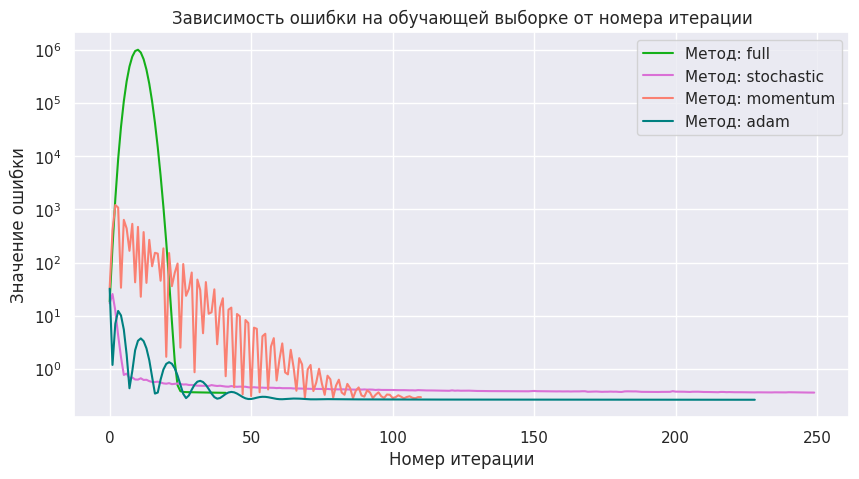

In [60]:
plt.figure(figsize=(10, 5))
col = {'full' : '#15B01A', 'stochastic': 'orchid', 'momentum': 'salmon', 'adam': 'teal'
}
plt.title('Зависимость ошибки на обучающей выборке от номера итерации')
for descent_type in ['full', 'stochastic', 'momentum', 'adam']:
    plt.plot(res['loss_history'][descent_type], color=col[descent_type], label=f'Метод: {descent_type}')
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')
plt.yscale('log')
plt.legend()
plt.show()

In [81]:
df = pd.DataFrame(res)
df.head(4)

,loss_on_train,loss_on_val,r2_train,loss_history,r2_val,iter_cnt,best_lambdas
full,0.354660,0.343232,0.634434,"[24.94155032459782, 281.0527422462027, 2281.87...",0.647245,44,1.000000
stochastic,0.373498,0.365552,0.615353,"[38.70219743495045, 35.48301639331339, 26.5124...",0.623172,173,0.464159
momentum,0.293568,0.282819,0.685215,"[24.994002415109733, 31.913880147507975, 24.98...",0.697469,99,0.464159
adam,0.261909,0.251879,0.729024,"[18.460397974482177, 1.7042355230429467, 9.456...",0.739798,183,1.000000


Сравним методы между собой:


*   При использованиее full самая долгая подстройка к адекватной ошибке (поначалу ошибка очень сильно растет, затем уменьшается)
*   В stohastic ошибка очень быстро уменьшается, и потом ее не шатает
*   А вот в momentum ошибку очень сильно шатает, сходится она долго
*  В adam ошибка тоже колеблется, но не с таким большим интервалом, в целом довольно быстро уменьшается, и потом остается меньше, чем ошибки при использовании других методов


## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [63]:
import time
def batches_in_stochastic(batch_size, k=10):
  time_secs = 0
  cnt_iterations = 0
  for i in range(k):
    regression = LinearRegression(
        descent_config = {
          'descent_name': 'stochastic',
          'kwargs': {
              'lambda_': res['best_lambdas']['stochastic'],
              'dimension': x_train.shape[1],
              'batch_size': batch_size
          }
        },
    )
    start_time = time.time()
    regression.fit(x_train, y_train)
    time_secs += time.time() - start_time
    cnt_iterations += len(regression.loss_history)
  return time_secs / k, cnt_iterations / k

In [64]:
batch_sizes = np.arange(5, 500, 10)
mean_cnt_iterations = {}
mean_time_secs = {}

for batch_size in batch_sizes:
    mean_cnt_iterations[batch_size], mean_time_secs[batch_size] = batches_in_stochastic(batch_size)

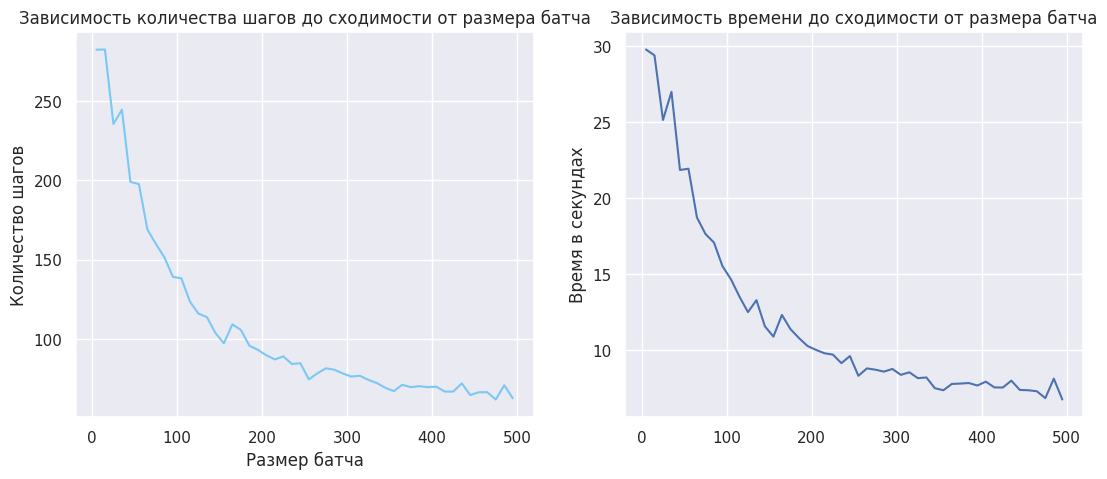

In [83]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.title('Зависимость количества шагов до сходимости от размера батча', fontsize=12)
sns.lineplot(x=batch_sizes,
             y=list(mean_time_secs.values()), color='#7BC8F6')
plt.xlabel('Размер батча', fontsize=12)
plt.ylabel('Количество шагов', fontsize=12)

plt.subplot(1, 2, 2)
plt.title('Зависимость времени до сходимости от размера батча', fontsize=12)
sns.lineplot(x=batch_sizes,
             y=list(mean_cnt_iterations.values()))
plt.xlabel('', fontsize=12)
plt.ylabel('Время в секундах', fontsize=12)
plt.show()

Из графиков видно, что при росте размера батча уменьшаются количество шагов и время до сходимости

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124789654/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [101]:
def best_lambdas_and_mus(x_train, y_train, x_val, y_val):
  metrics = {
    'loss_on_train': {},
    'loss_on_val': {descent_type: float('inf') for descent_type in ['full', 'stochastic', 'momentum', 'adam']},
    'r2_train': {},
    'loss_history': {},
    'r2_val': {},
    'iter_cnt': {},
    'best_lambdas': {},
    'best_mus': {}
  }

  log_grid = np.logspace(-3, 0, 5)
  mu_grid = np.logspace(-3, 0, 5)

  for descent_type in ['full', 'stochastic', 'momentum', 'adam']:
    for lmbd in log_grid:
      for mu in mu_grid:
        descent_config = {
            'descent_name': descent_type,
            'regularized': True,
            'kwargs': {
                'lambda_': lmbd,
                'mu': mu,
                'dimension': x_train.shape[1],
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
        )

        regression.fit(x_train, y_train)

        loss_on_val = regression.calc_loss(x_val, y_val)
        if loss_on_val < metrics['loss_on_val'][descent_type]:
          metrics['loss_on_train'][descent_type] = regression.calc_loss(x_train, y_train)
          metrics['loss_on_val'][descent_type] = loss_on_val
          metrics['r2_train'][descent_type] = r2_score(regression.predict(x_train), y_train)
          metrics['r2_val'][descent_type] = r2_score(regression.predict(x_val), y_val)
          metrics['loss_history'][descent_type] = regression.loss_history
          metrics['iter_cnt'][descent_type] = len(regression.loss_history)
          metrics['best_lambdas'][descent_type] = lmbd
          metrics['best_mus'][descent_type] = mu

  return metrics

In [102]:
res_with_reg = best_lambdas_and_mus(x_train, y_train, x_test, y_test)

In [104]:
df1 = pd.DataFrame(res_with_reg)[['r2_train', 'r2_val', 'iter_cnt']].rename(columns={'r2_train': 'r2_train_reg', 'r2_val': 'r2_val_reg', 'iter_cnt': 'iter_cnt_reg'})
df2 = pd.DataFrame(res)[['r2_train', 'r2_val', 'iter_cnt']]
df = df2.merge(df1, left_index=True, right_index=True)
df

,r2_train,r2_val,iter_cnt,r2_train_reg,r2_val_reg,iter_cnt_reg
full,0.636585,0.649131,43,0.643779,0.656844,301
stochastic,0.634166,0.646755,161,0.659987,0.672238,301
momentum,0.689615,0.702304,111,0.708602,0.721163,149
adam,0.729357,0.740079,187,0.719544,0.730652,301


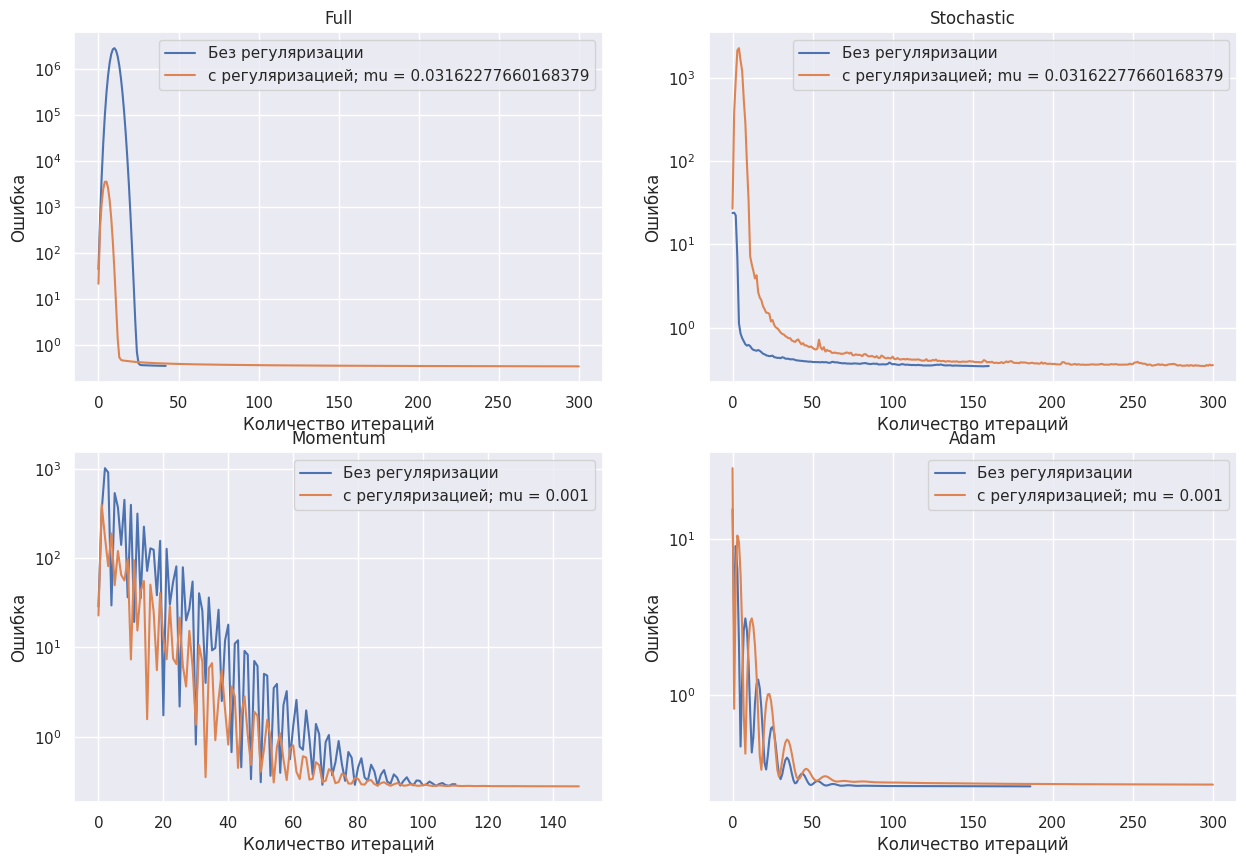

In [109]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Full', fontsize=12)
plt.plot(res['loss_history']['full'], label='Без регуляризации')
plt.plot(res_with_reg['loss_history']['full'], label=f'с регуляризацией; mu = {res_with_reg["best_mus"]["full"]}')
plt.yscale('log')
plt.xlabel('Количество итераций', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Stochastic', fontsize=12)
plt.plot(res['loss_history']['stochastic'], label='Без регуляризации')
plt.plot(res_with_reg['loss_history']['stochastic'], label=f'с регуляризацией; mu = {res_with_reg["best_mus"]["stochastic"]}')
plt.yscale('log')
plt.xlabel('Количество итераций', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Momentum', fontsize=12)
plt.plot(res['loss_history']['momentum'], label='Без регуляризации')
plt.plot(res_with_reg['loss_history']['momentum'], label=f'с регуляризацией; mu = {res_with_reg["best_mus"]["momentum"]}')
plt.yscale('log')
plt.xlabel('Количество итераций', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()

plt.subplot(2, 2, 4)
plt.title('Adam', fontsize=12)
plt.plot(res['loss_history']['adam'], label='Без регуляризации')
plt.plot(res_with_reg['loss_history']['adam'], label=f'с регуляризацией; mu = {res_with_reg["best_mus"]["adam"]}')
plt.yscale('log')
plt.xlabel('Количество итераций', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()

plt.show()

Из графиков и таблицы видно, что регуляризация положительно влияет на сходимость: ошибка в среднем меньше, сходимость лучше (количество итераций меньше). Объяснить это можно тем, что, как мы обсуждали на лекции: лин. модель переобучена <=> большие веса. То есть регуляризация (введение штрафов за большие веса) положиельно влияет на модель.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

Обозначим $z = xw - y$. Тогда:

$$
L(y, x, w) = \log(\cosh(z))
$$

Найдем производную $ \frac{\partial L}{\partial w}$:

$$
\frac{\partial L}{\partial w} = \frac{d}{dz} \log(\cosh(z)) \cdot \frac{\partial z}{\partial w}
= \frac{1}{\cosh(z)} \cdot \sinh(z) \cdot x
$$

Используем, что $ \frac{\sinh(z)}{\cosh(z)} = \tanh(z)$:

$$
\frac{\partial L}{\partial w} = x \cdot \tanh(z)
$$

Подставляем $z = xw - y$:

$$
\frac{\partial L}{\partial w} = x \cdot \tanh(xw - y)
$$

Итог:

$$
\frac{\partial L}{\partial w} = x \cdot \tanh(xw - y)
$$

Подставим найденный градиент функции потерь Log-Cosh

$$
\frac{\partial}{\partial w} Q(w) = \frac{1}{\ell} \sum_{i=1}^{\ell} x_i \cdot \tanh(x_i w - y_i).
$$

### Ответ:
$$
\frac{1}{\ell}X^T\tanh(Xw-y)
$$



Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [108]:
from descents import LossFunction
def best_lambdas_logcosh(x_train, y_train, x_val, y_val):
  metrics = {
    'loss_on_train': {},
    'loss_on_val': {descent_type: float('inf') for descent_type in ['full', 'stochastic', 'momentum', 'adam']},
    'r2_train': {},
    'loss_history': {},
    'r2_val': {},
    'iter_cnt': {},
    'best_lambdas': {},
  }

  log_grid = np.logspace(-3, 0, 5)

  for descent_type in ['full', 'stochastic', 'momentum', 'adam']:
    for lmbd in log_grid:
      descent_config = {
          'descent_name': descent_type,
          'regularized': True,
          'kwargs': {
              'lambda_': lmbd,
              'loss_function': LossFunction.LogCosh,
              'dimension': x_train.shape[1],
          }
      }
      regression = LinearRegression(
          descent_config=descent_config,
      )

      regression.fit(x_train, y_train)

      loss_on_val = regression.calc_loss(x_val, y_val)
      if loss_on_val < metrics['loss_on_val'][descent_type]:
        metrics['loss_on_train'][descent_type] = regression.calc_loss(x_train, y_train)
        metrics['loss_on_val'][descent_type] = loss_on_val
        metrics['r2_train'][descent_type] = r2_score(regression.predict(x_train), y_train)
        metrics['r2_val'][descent_type] = r2_score(regression.predict(x_val), y_val)
        metrics['loss_history'][descent_type] = regression.loss_history
        metrics['iter_cnt'][descent_type] = len(regression.loss_history)
        metrics['best_lambdas'][descent_type] = lmbd

  return metrics

In [ ]:
res_LogCosh = best_lambdas_logcosh(x_train, y_train, x_test, y_test)

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: